In [1]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

%matplotlib inline

# Visualisation de données --- matplotlib

## Introduction

Dans cette partie nous allons uniquement nous intéresser à la problématique de tracer et visualiser des résultats. Qu'il s'agisse de résultats de simulations ou de résultats expérimentaux la problématique de la visualisation est un véritable enjeux. Peut importe la carrière que vous choisirez, académique ou industrielle, vous vous appercevrez rapidement que tout est une histoire de communication. En effet peut importe que vous ayez les meilleurs résultats possible, si vous n'êtes pas capable de les mettres en forme de manière **propre**, **concise** et **efficace** vous n'attirerez pas l'attention !! Et cette remarque est bien évidemment également valable pour les cours. 

### Illustration 1 : résultat d'un calcul numérique

Pour ce premier exemple nous allons simuler la réponse d'un modèle de comportement visco-élastique de type Zener à une sollicitation de fluage. C'est un problème pour lequel on peut calculer une solution analytique. La résolution de ce problème se fait de la manière suivante : 

In [1]:
from math import exp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('classic')

def solve_zener_fluage( E1, E2, eta, sig0, t_min, t_max, n_step):
    tauf = eta*(E1+E2)/(E1*E2)
    taur = eta/E2
    t_fluage = 0.5*(t_max - t_min)
    
    def sig_fluage(t):
        if t <= t_fluage:
            return sig0
        else:
            return 0.
    
    def eps_fluage( t ):
        if t <= t_fluage:
            return (sig0 / E1 ) * ( 1 - (E2/(E1+E2)) * exp( - t / tauf ) )
        else :
            return eps_fluage( t_fluage ) * exp( - ( t - t_fluage )/ tauf )
    
    sigma = []
    eto = []
    for t in np.linspace(t_min, t_max, n_step):
        sigma.append( sig_fluage(t) )
        eto.append( eps_fluage(t) )    
    return sigma, eto



    

Ci-dessous voici une première présentation des résultats, minimaliste et qui ne donne pas envie de trop chercher à comprendre. 

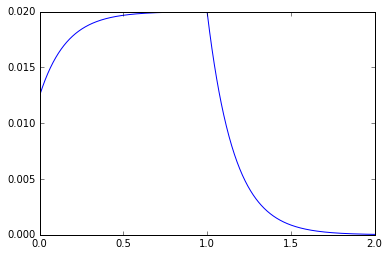

In [2]:
t_min = 0 
t_max = 2.
n_step = 1000
E1 = 5000.
E2 = 3000.
eta = 500. * (E2/E1)
sig0 = 100.

sig, eto = solve_zener_fluage(E1,E2,eta,sig0,t_min,t_max,n_step)

time = np.linspace(t_min, t_max, n_step)

plt.plot(time, eto)


In [3]:
%matplotlib inline
from ipywidgets import interactive, FloatSlider


def handler(E1, E2, sig0):
    plt.style.use('ggplot')
    t_min = 0 
    t_max = 2.
    n_step = 1000
    eta = 500. * (E2/E1)
    sig, eto = solve_zener_fluage(E1,E2,eta,sig0,t_min,t_max,n_step)
    time = np.linspace(t_min, t_max, n_step)
    plt.xlabel("Temps (s)")
    plt.ylabel("Déformation (mm/mm)")
    plt.plot(time, eto)
    #plt.grid()
    plt.ylim(0,0.01)
    plt.xlim(0,2.)

w = interactive(handler, E1=FloatSlider(min=10000., max=50000., step=10000., value=25000.), 
                E2=FloatSlider(min=10000., max=100000., step=10000., value=30000.),
                sig0=FloatSlider(min=10., max=500., step=10., value=100.))    
from IPython.display import display
display(w)

interactive(children=(FloatSlider(value=25000.0, description='E1', max=50000.0, min=10000.0, step=10000.0), Fl…

In [5]:
plt.style.use('classic')

## Utilisation de Matpotlib

LE module de référence en Python pour le tracé de graphiques est [matplolib](https://matplotlib.org). Il s'agit d'une librairie Python de tracée de tracé de graphiques scientifique développé avec la volonté d'offrir une interface simple permettant de réaliser des graphiques pouvant sans retouches être intégrés dans des rapports ou des publications. Les fonctionnalités offertes par matplotlib sont nombreuses : 

* Tracé de courbes, histogramm, bar d'erreur, bar charts, scatterplots, ...
* Tracé de surfaces 
* Possibilité de tracé de courbe animées
* Ajout de widgets pour des tracés interactifs

Pour une revue complète des fonctionnalités disponible avec matplotlib vous êtes encouragé à aller voir la [gallerie](https://matplotlib.org/gallery/index.html) d'exemples qui balaye l'ensemble des choses possibles avec matplotlib et surtout fournit pour chaque exemple le code source associé. 

Plus précisément nous allons nous intéresser au sous-module `matplotlib.pyplot` qui permet d'encapsuler et de rendre transparent pour l'utilisateur un bon nombre d'actions, permettant ainsi d'avoir des fonctionnalités de tracé similaires, en terme de simplicité d'utilisation, à celles de Matlab.

In [6]:
import matplotlib.pyplot as plt

### Tracé d'une ou plusieurs courbes et contrôle des paramètres

Pour tracer une courbe toute simple avec matplotlib, la démarche est très simple et nécessite l'utilisation de la fonction `plot`. Cette fonction dans sa version "minimale" ne prend en entrée que deux arguments `x` et `y` qui peuvent être des listes, des tuples, des arrays numpy entre autres. 

Par exemple : 

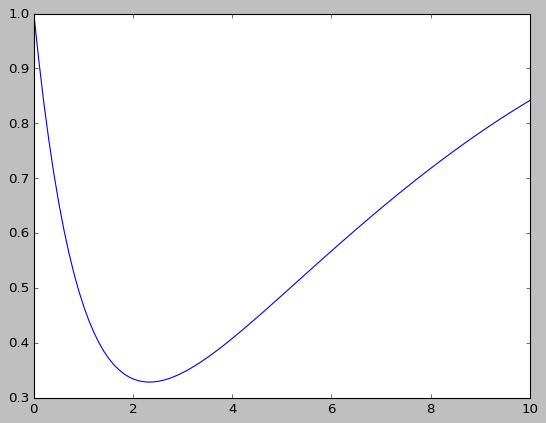

In [7]:
x = np.linspace(0,10,100)
y = np.sin( 0.1 *x ) + np.exp( - x )

plt.plot(x,y)

L'usage de cette fonction est donc très très simple. Cependant en l'état le graphique est assez "pauvre". Une première chose a faire est d'ajouter un certain nombre d'informations sur le graphique tels que : (i) titre ; (ii) titre des axes. 

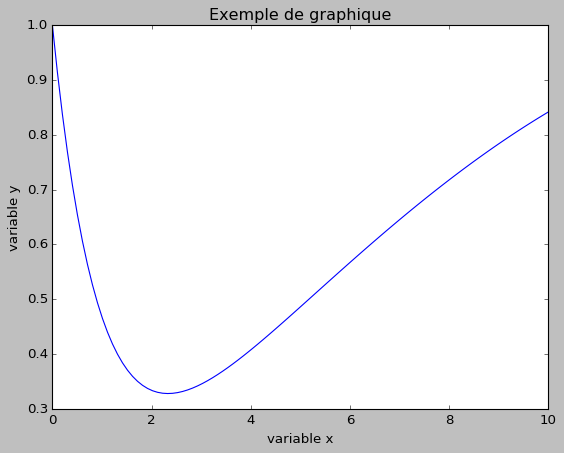

In [8]:
plt.plot(x,y)
plt.xlabel("variable x")
plt.ylabel("variable y")
plt.title("Exemple de graphique")
plt.show()

Ensuite si on le souhaite on peut bien évidemment tracer plusieurs courbes sur le même graphique. Pour cela il suffit d'enchainer les `plt.plot` à la suite. Par exemple : 

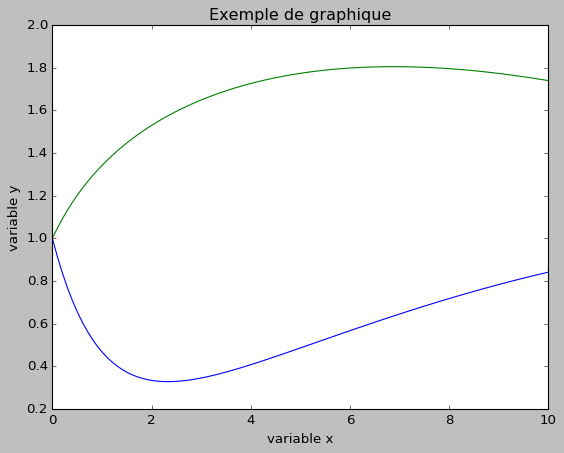

In [9]:
y2 = np.cos( 0.1 * x ) + 0.5*np.log(1+x)

plt.plot(x, y)
plt.plot(x, y2)
plt.xlabel("variable x")
plt.ylabel("variable y")
plt.title("Exemple de graphique")
plt.show()

On constate tout d'abord que matplotlib change automatiquement la couleur de la seconde courbe permettant ainsi de distinguer facilement les deux courbes. En revanche il n'y a pas par défaut de moyen pour savoir quelle courbe correspond à quelle fonction. Pour cela il faudrait ajourer une légende au graphique. Cela est possible en utilisant `plt.legend` et l'argument label de la fonction `plot`. Cela donne sur le graphique précédent : 

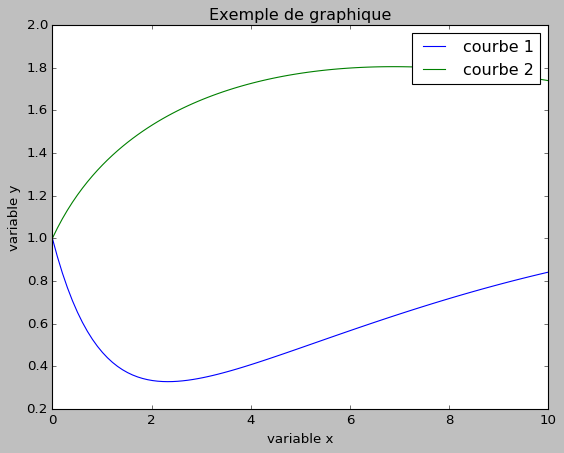

In [10]:
plt.plot(x,y, label='courbe 1')
plt.plot(x, y2, label="courbe 2")
plt.legend()
plt.xlabel("variable x")
plt.ylabel("variable y")
plt.title("Exemple de graphique")
plt.show()

Il est bien entendu possible de choisir la position de la légende, pour plus d'informations à ce sujet vous êtes encouragé à aller faire un tour sur la documentation des légéndes dans matplotlib. 

Il est ensuite possible de modifier un certains nombre de paramètres de tracé des courbes : 
* Épaisseur du trait
* Style du trait 
* Couleur
* Marqueurs de points
* ... 

Voici ci-dessous un exemple où l'on modifie l'intégralité des paramètres énoncés précédemment. 

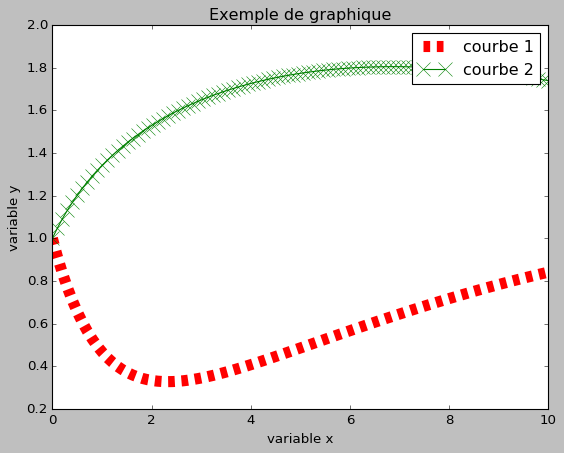

In [11]:
plt.plot(x,y, label="courbe 1", color="red", linewidth=10, linestyle="dashed")
plt.plot(x, y2, label="courbe 2", marker="x", color="green", markersize=12) 
plt.legend()
plt.xlabel("variable x")
plt.ylabel("variable y")
plt.title("Exemple de graphique")
plt.show()

Pour de plus amples détails sur les paramètres de configurations des courbes et les valeurs possibles pour ces paramètres je vous invite encore une fois à aller faire un tour sur la documention de matplotlib. 

Enfin le dernier point que l'on va aborder concerne le design général des graphiques avec matplotlib. En effet vous pourriez me faire remarquer qu'en l'état les courbes ne sont pas très folichonne et que l'on peut difficilement (si l'on est pointilleux) les intégrers telles quels dans un rapport ou une présentation. Et vous auriez raison !! Mais pas d'inquiétude il y a une solution. Tout d'abord il y a à disposition les *stylesheets* qui permettent de radicalement modifier le style de vos graphiques. Les feuilles de styles à votre disposition peuvent être listés à l'aide de la commande suivante :

In [12]:
plt.style.available

['seaborn-colorblind',
 'bmh',
 'seaborn-dark',
 'seaborn-white',
 'grayscale',
 'seaborn',
 'ggplot',
 'fivethirtyeight',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'dark_background',
 'seaborn-paper',
 'seaborn-poster',
 '_classic_test',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-muted',
 'seaborn-ticks',
 'tableau-colorblind10',
 'seaborn-pastel',
 'fast',
 'classic',
 'Solarize_Light2',
 'seaborn-deep',
 'seaborn-whitegrid']

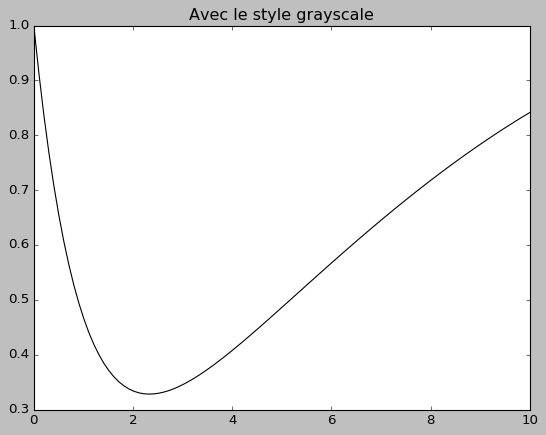

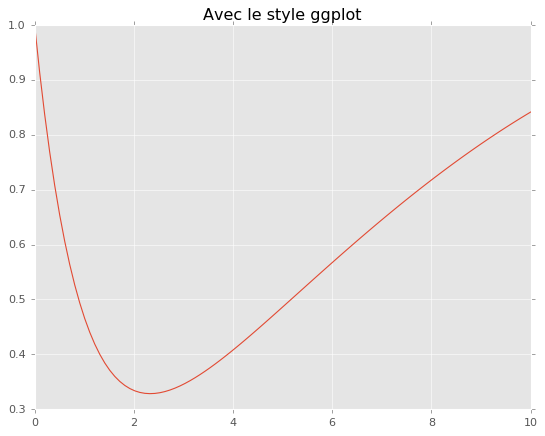

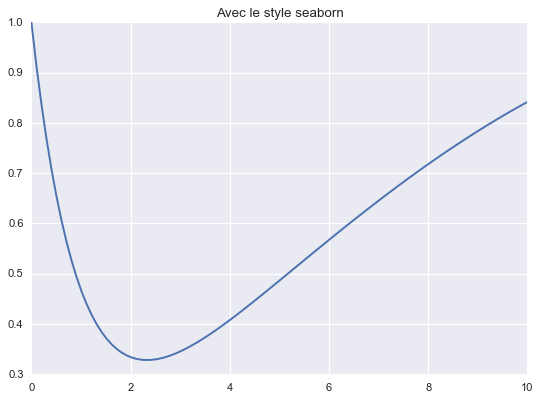

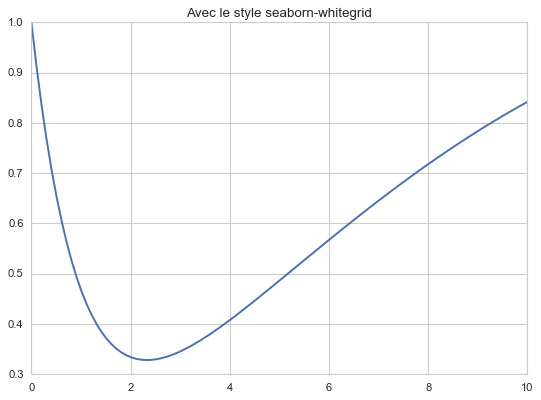

In [13]:
def style_example( s ):
    plt.style.use( s )
    x = np.linspace(0,10,100)
    y = np.sin( 0.1 *x ) + np.exp( - x )
    plt.plot(x,y)
    plt.title("Avec le style {}".format(s))
    plt.show()
    
style_list = ['grayscale', 'ggplot','seaborn','seaborn-whitegrid']
  
 
for style in style_list:
    style_example( style )

### Les subplots

A présent vous savez comment tracer un graphique sur lequel vous pouvez ajouter plusieurs courbes. Cependant il peut s'avérer utilie dans certains cas d'afficher sur une même figure plusieurs courbes associées à des quantités n'ayant pas du tout la même échelle ni le même sens physique. Pour ce faire la solution la plus simple est de réaliser deux graphiques séparés dans la même fenêtre. Pour cela il faut utiliser des `subplot`. 

La syntaxe est la suivante : 

```python
plt.subplot( nb_ligne, nb_colonne, graphique_id )
```


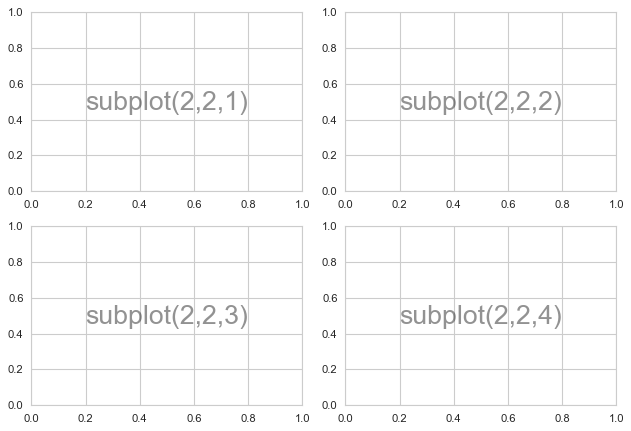

In [14]:
plt.subplot(2,2,1)
plt.text(0.5,0.5, 'subplot(2,2,1)',ha='center',va='center',size=24,alpha=.5)
plt.subplot(2,2,2)
plt.text(0.5,0.5, 'subplot(2,2,2)',ha='center',va='center',size=24,alpha=.5)
plt.subplot(2,2,3)
plt.text(0.5,0.5, 'subplot(2,2,3)',ha='center',va='center',size=24,alpha=.5)
plt.subplot(2,2,4)
plt.text(0.5,0.5, 'subplot(2,2,4)',ha='center',va='center',size=24,alpha=.5)
plt.tight_layout()

Pour information il est également possible de gérer le positionnement des subplot à l'aide de la commande `plt.subplots` qui génère directement l'ensemble des sous-figures. Cette approche est, dans certains cas, plus pratiques car elle permet de manipuler directement les objets `Axes` de matplotlib. 

### Autre chose que des courbes : histogramme et scatter plot

Jusqu'à présent les seules représentations de données que nous avons vu sont les courbes. Or cela peut ne pas être la réprésentation la plus pertinente suivant les données que l'on souhaite présenter. Nous allons donc voir à présents deux autres modes de représentation de données qui pouront certainement vous être utiles. 

#### Les histogrammes

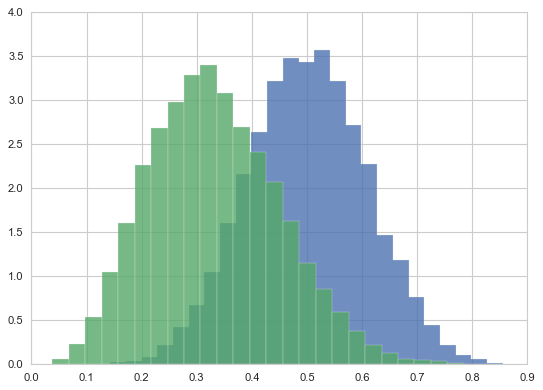

In [15]:
from numpy.random import beta
plt.hist(beta(10, 10, size=10000), histtype="stepfilled", bins=25, alpha=0.8, density=True)
plt.hist(beta(5, 10, size=10000), bins=25, alpha=0.8, density=True)
plt.show()

#### Les scatter plot

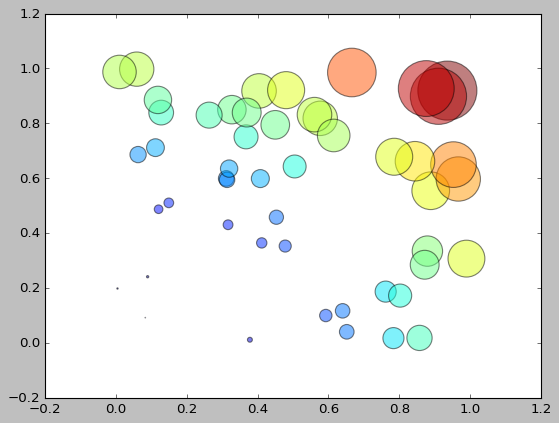

In [16]:
plt.style.use("classic")
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
z = x**2+y**2
color = z
area = np.pi * (30 * z / z.max())**2  # 0 to 15 point radii
plt.scatter(x, y, s=area, c=color, alpha=0.5)
plt.show()


### Quelques mots sur le tracé de surfaces

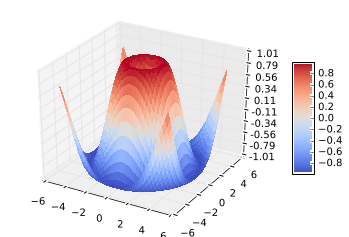

In [28]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.025)
Y = np.arange(-5, 5, 0.025)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


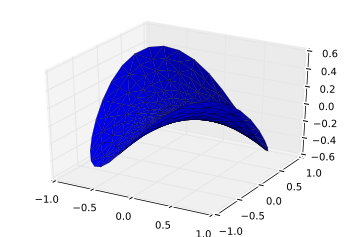

In [27]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius.
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()

### Pour finir : juste pour le fun

Pour terminer ce tour d'horizon rapide de matplotlib je vous propose de rigoler un peu en faisant une petite illustration d'une commande au nom étrange `plt.xkcd()`. Le nom de cette commande vient du webcomic du même nom [https://xkcd.com/](https://xkcd.com/) et l'idée est de proposer un tracé de courbe avec un rendu "fait à la main". 

Une illustration valant toujours mieux qu'un long discourt voici ci dessous un exemple d'utilisation. 

/home/zebulon/local/miniconda/miniconda3/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zebulon/local/miniconda/miniconda3/envs/notebook/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)


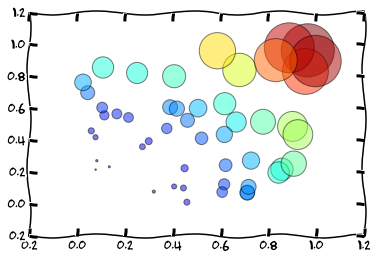

In [5]:
%matplotlib inline
plt.figure()
plt.style.use("classic")
with plt.xkcd(2,100,2):
    N = 50
    x = np.random.rand(N)
    y = np.random.rand(N)
    z = x**2+y**2
    color = z
    area = np.pi * (30 * z / z.max())**2  # 0 to 15 point radii
    plt.scatter(x, y, s=area, c=color, alpha=0.5)

plt.show()


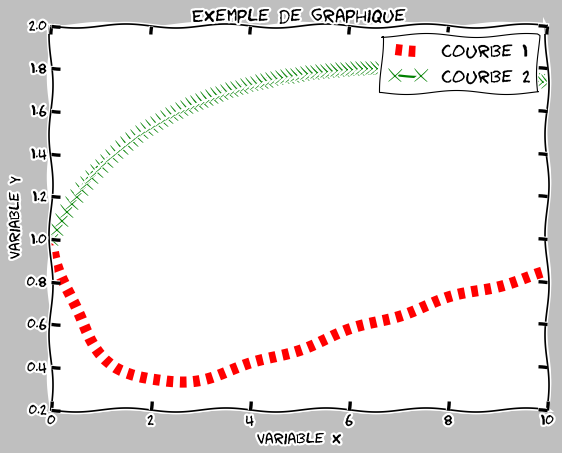

In [7]:
plt.figure()
with plt.xkcd(2,100,1):
    x = np.linspace(0,10,100)
    y = np.sin( 0.1 *x ) + np.exp( - x )
    y2 = np.cos( 0.1 * x ) + 0.5*np.log(1+x)
    plt.plot(x,y, label="courbe 1", color="red", linewidth=10, linestyle="dashed")
    plt.plot(x, y2, label="courbe 2", marker="x", color="green", markersize=12) 
    plt.legend()
    plt.xlabel("variable x")
    plt.ylabel("variable y")
    plt.title("Exemple de graphique")
    plt.show()

## Pour information

Bien évidemment `matplotlib` n'est pas la seule librairie disponible pour tracer des courbes en Python, il s'agit juste de la plus répandue. Parmi les alternatives (ou améliorations) possibles il existe :  

* plotly
* bokeh
* seaborn
* mayavi
* vtk
* et bien d'autre

Une seule chose à retenir sur matplotlib [https://matplotlib.org/stable/gallery/index.html](https://matplotlib.org/stable/gallery/index.html)

